In [1]:
import os
import cv2
import torch
import numpy as np
import torch
import time

from facenet_pytorch import MTCNN, InceptionResnetV1
from IPython.display import clear_output



In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.4, 0.5, 0.5], factor=0.709, post_process=True,
    select_largest = True,
    device=device
)

model = InceptionResnetV1(pretrained='vggface2',
                          classify=False)

model.eval()

clear_output()

In [3]:
root_dir = "Dataset"


In [20]:
vector_face = []
name_face = []
count=1
for folder in os.listdir(root_dir):
    num_length =  len(os.listdir(os.path.join(root_dir, folder)))
    foot_dir = os.path.join(root_dir, folder)
    all_face = []
    img_train = []
    clear_output()
    print(f"Đang tiến hành {count}/{len(os.listdir(root_dir))}: {folder}")
    count+=1
    for file in os.listdir(foot_dir):
        img = cv2.imread(os.path.join(foot_dir, file))
        print(file)
        img = cv2.resize(img, (512,512))
        all_face.append(img)
    
    img_train = all_face[:int(0.7*num_length)]

    all_vector_emb = []
    for img in img_train:
        filename_crop = mtcnn(img)
        if filename_crop is not None:
            vector_emb = None
            vector_emb = model(filename_crop.reshape(1, 3, 160, 160))
            all_vector_emb.append(vector_emb)
   
    emb = None
    emb = torch.cat(all_vector_emb).mean(0, keepdim=True)
    vector_face.append(emb)
    name_face.append(folder)

vector_face = torch.cat(vector_face)
name_face = np.array(name_face)
torch.save(vector_face, "vector_face.pth")
np.save("name_face", name_face)

Đang tiến hành 31/31: Zac Efron
Zac Efron_0.jpg


Zac Efron_1.jpg
Zac Efron_10.jpg
Zac Efron_11.jpg
Zac Efron_12.jpg
Zac Efron_13.jpg
Zac Efron_14.jpg
Zac Efron_15.jpg
Zac Efron_16.jpg
Zac Efron_17.jpg
Zac Efron_18.jpg
Zac Efron_19.jpg
Zac Efron_2.jpg
Zac Efron_20.jpg
Zac Efron_21.jpg
Zac Efron_22.jpg
Zac Efron_23.jpg
Zac Efron_24.jpg
Zac Efron_25.jpg
Zac Efron_26.jpg
Zac Efron_27.jpg
Zac Efron_28.jpg
Zac Efron_29.jpg
Zac Efron_3.jpg
Zac Efron_30.jpg
Zac Efron_31.jpg
Zac Efron_32.jpg
Zac Efron_33.jpg
Zac Efron_34.jpg
Zac Efron_35.jpg
Zac Efron_36.jpg
Zac Efron_37.jpg
Zac Efron_38.jpg
Zac Efron_39.jpg
Zac Efron_4.jpg
Zac Efron_40.jpg
Zac Efron_41.jpg
Zac Efron_42.jpg
Zac Efron_43.jpg
Zac Efron_44.jpg
Zac Efron_45.jpg
Zac Efron_46.jpg
Zac Efron_47.jpg
Zac Efron_48.jpg
Zac Efron_49.jpg
Zac Efron_5.jpg
Zac Efron_50.jpg
Zac Efron_51.jpg
Zac Efron_52.jpg
Zac Efron_53.jpg
Zac Efron_54.jpg
Zac Efron_55.jpg
Zac Efron_56.jpg
Zac Efron_57.jpg
Zac Efron_58.jpg
Zac Efron_59.jpg
Zac Efron_6.jpg
Zac Efron_60.jpg
Zac Efron_61.jpg
Zac Efron_62.jpg
Zac

In [4]:
def load_data():
    model_weights = torch.load('vector_face.pth')
    usernames = np.load('name_face.npy')
    return model_weights, usernames

In [5]:
model_weights, usernames = load_data()

In [6]:
usernames

array(['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt',
       'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma',
       'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron',
       'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen',
       'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan',
       'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow',
       'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra',
       'Robert Downey Jr', 'Roger Federer', 'Tom Cruise',
       'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron', 'Trung Hieu'],
      dtype='<U18')

In [7]:
def euclidean_distance(tensor1, tensor2):

     # Tính tổng bình phương của chênh lệch giữa các giá trị của 2 tensor
    squared_difference = torch.pow(tensor1 - tensor2, 2)

    # Tính tổng bình phương của các giá trị của 2 tensor
    squared_norm = torch.sum(squared_difference)

    # Trả về khoảng cách Euclidian
    return torch.sqrt(squared_norm)

In [8]:
label_test = []
label_pred = []
img_pred_false = []
count=1
for folder in os.listdir(root_dir):
    num_length =  len(os.listdir(os.path.join(root_dir, folder)))
    foot_dir = os.path.join(root_dir, folder)
    all_face = []
    img_test = []
    clear_output()
    print(f"Đang tiến hành {count}/{len(os.listdir(root_dir))}: {folder}")
    count+=1
    for file in os.listdir(foot_dir):
        img = cv2.imread(os.path.join(foot_dir, file))
        print(file)
        img = cv2.resize(img, (512,512))
        all_face.append(img)
    
    img_test = all_face[int(0.7*num_length):]

    for img in img_test:
        filename_crop = mtcnn(img)
        if filename_crop is not None:
            vector_emb = None
            vector_emb = model(filename_crop.reshape(1, 3, 160, 160))
            prob = []
            for i in range(len(usernames)):
                prob.append(euclidean_distance(vector_emb[0], model_weights[i]))
            prob = np.array([ele.detach().numpy() for ele in prob], dtype=float)
            min_distance = np.min(prob)
            
            label_pred.append(usernames[np.argmin(prob)])
            label_test.append(folder)
            if usernames[np.argmin(prob)]!=folder:
                img_pred_false.append(img)


Đang tiến hành 31/31: Zac Efron
Zac Efron_0.jpg
Zac Efron_1.jpg
Zac Efron_10.jpg
Zac Efron_11.jpg
Zac Efron_12.jpg
Zac Efron_13.jpg
Zac Efron_14.jpg
Zac Efron_15.jpg
Zac Efron_16.jpg
Zac Efron_17.jpg
Zac Efron_18.jpg
Zac Efron_19.jpg
Zac Efron_2.jpg
Zac Efron_20.jpg
Zac Efron_21.jpg
Zac Efron_22.jpg
Zac Efron_23.jpg
Zac Efron_24.jpg
Zac Efron_25.jpg
Zac Efron_26.jpg
Zac Efron_27.jpg
Zac Efron_28.jpg
Zac Efron_29.jpg
Zac Efron_3.jpg
Zac Efron_30.jpg
Zac Efron_31.jpg
Zac Efron_32.jpg
Zac Efron_33.jpg
Zac Efron_34.jpg
Zac Efron_35.jpg
Zac Efron_36.jpg
Zac Efron_37.jpg
Zac Efron_38.jpg
Zac Efron_39.jpg
Zac Efron_4.jpg
Zac Efron_40.jpg
Zac Efron_41.jpg
Zac Efron_42.jpg
Zac Efron_43.jpg
Zac Efron_44.jpg
Zac Efron_45.jpg
Zac Efron_46.jpg
Zac Efron_47.jpg
Zac Efron_48.jpg
Zac Efron_49.jpg
Zac Efron_5.jpg
Zac Efron_50.jpg
Zac Efron_51.jpg
Zac Efron_52.jpg
Zac Efron_53.jpg
Zac Efron_54.jpg
Zac Efron_55.jpg
Zac Efron_56.jpg
Zac Efron_57.jpg
Zac Efron_58.jpg
Zac Efron_59.jpg
Zac Efron_6.jpg
Zac Ef

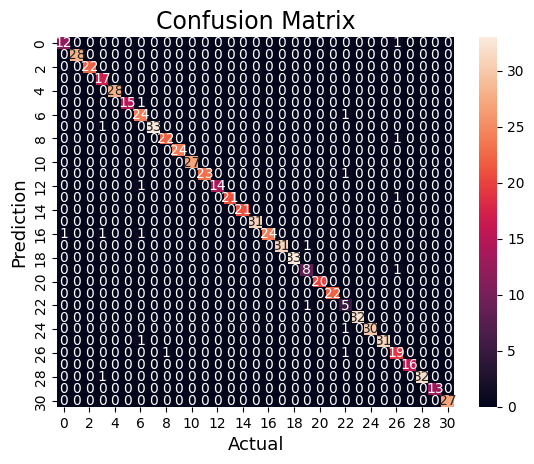

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(label_test,label_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



In [11]:
print(classification_report(label_test, label_pred))

                    precision    recall  f1-score   support

      Akshay Kumar       0.92      0.92      0.92        13
Alexandra Daddario       1.00      1.00      1.00        28
        Alia Bhatt       1.00      1.00      1.00        22
  Amitabh Bachchan       0.85      1.00      0.92        17
      Andy Samberg       1.00      1.00      1.00        28
    Anushka Sharma       1.00      0.94      0.97        16
     Billie Eilish       0.86      0.96      0.91        25
         Brad Pitt       1.00      0.97      0.99        34
    Camila Cabello       0.96      0.96      0.96        23
   Charlize Theron       1.00      1.00      1.00        24
       Claire Holt       1.00      1.00      1.00        27
      Courtney Cox       1.00      0.96      0.98        24
    Dwayne Johnson       1.00      0.93      0.97        15
   Elizabeth Olsen       1.00      0.95      0.98        22
   Ellen Degeneres       1.00      1.00      1.00        21
      Henry Cavill       1.00      1.00

In [42]:
img_pred_false = np.array(img_pred_false)
img_pred_false.shape

(19, 512, 512, 3)

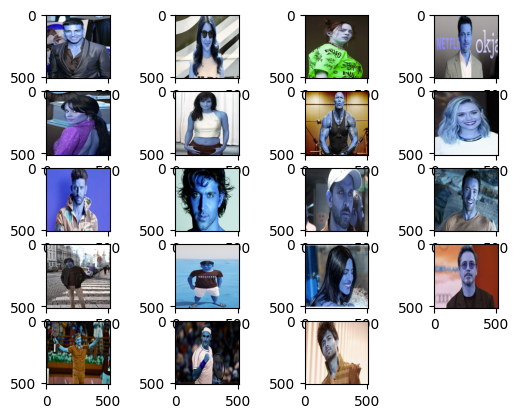

In [46]:
fig, axes = plt.subplots(5, 4)
for i in range(5):
    for j in range(4):
        if i*4 + j >=19:
            break
        axes[i, j].imshow(img_pred_false[i*4 + j])
plt.axis("off")
plt.show()